> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: NO SHOW APOINTMENT DATA ANALYSIS
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


In [69]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.4MB/s eta 0:00:01  3% |█                               | 348kB 20.8MB/s eta 0:00:01    77% |████████████████████████▉       | 8.1MB 27.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.0MB/s eta 0:00:01   37% |████████████                    | 5.0MB 26.8MB/s eta 0:00:01    55% |█████████████████▊              | 7.4MB 25.7MB/s eta 0:00:01    64% |████████████████████▊           | 8.7MB 25.8MB/s eta 0:00:01    74% |███████████████████████▊        | 9.9MB 26.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [70]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [72]:
df.shape

(110527, 14)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [74]:
print('Total missing values:', df.isna().sum())

Total missing values: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [75]:
print('Total missing values:', df.isna().sum().sum())

Total missing values: 0


In [76]:
df.duplicated().sum()

0

In [77]:
#appointment id has all unique values
len(df['AppointmentID'].unique())

110527

In [78]:
df['PatientId'].nunique()#there is 62299 non unique value of 110527 data

62299

In [79]:
#check number of duplicated patientIDs
df['PatientId'].duplicated().sum()


48228

There is 48228 duplicate ID

In [80]:
#check the number of duplicated Id and No show
#to check if there are patient ID duplicated but not in No show status 
df.duplicated(['PatientId','No-show']).sum()

38710

In [81]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [82]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The describtion show the ages sampled min showing -1 must be an error which must be corrected and 25% of the patient is of age 18, 50% being 37 and 75% being 55, with maximum of 115

In [83]:
# to identify the row index value for -1 age
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [84]:
# romove the roll
df.drop(index=99832,inplace=True)

In [85]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [86]:
#correction of columns names error
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [87]:
#removing duplicated Ids with Duplicated Showing or not status, leaving duplicated Ids with diffrent in showing status for 
#there can be duplicated appointments
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [88]:
#Removing data not useful for analysis
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [89]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### General overview of Data


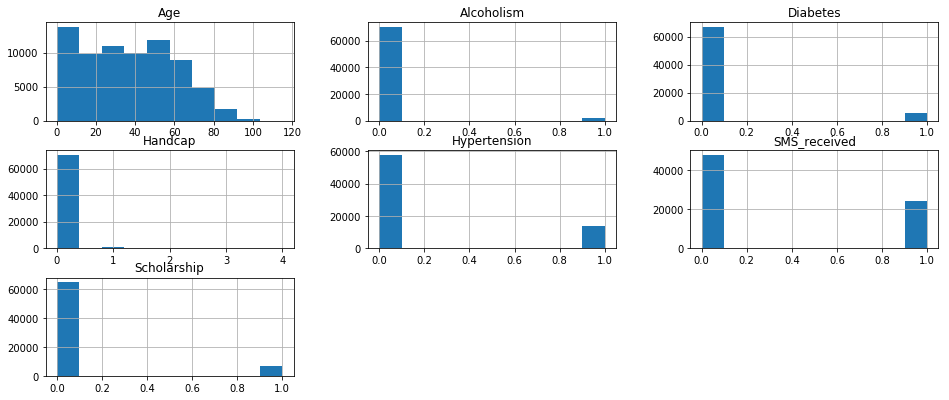

In [90]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));

In [91]:
# dividing data into two groups showing or not and anaalysing them
show=df.No_show=='No'
Noshow=df.No_show=='Yes'
df[show].count(),df[Noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

Number of Showed patient is 54153 and No show patient is 17663, Showed patient is more that no show patient

In [92]:
df[show].mean(),df[Noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age of showed patient is 37 and that of no show is 34, the noshow patient recieved more sms that the showed patient
this mean for sms had no effect on the showing of patient at the hospital

### INVESTIGATION OF THE INFLUENCING FACTORS ON THE ATTENDANCE RATE

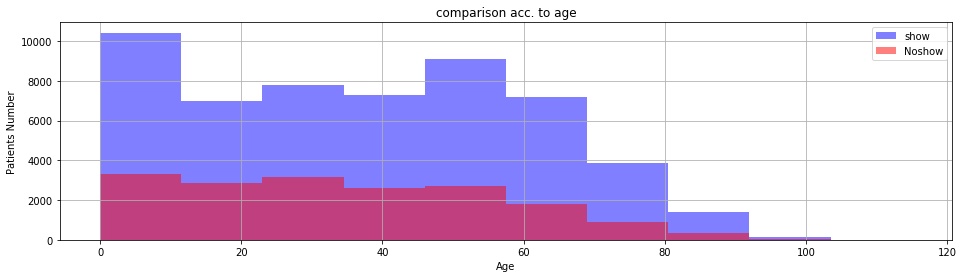

In [93]:
def attendance(df,col_name,attended,absent):#setting
    
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][Noshow].hist(alpha=.5,bins=10,color='red',label='Noshow')
    plt.legend();
    plt.title('comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'Age',show,Noshow)

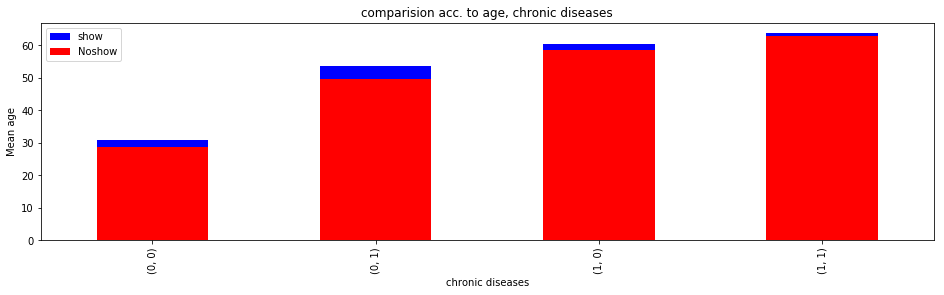

In [94]:
plt.figure(figsize=[16,4])# setting the figure size
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[Noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='Noshow')
plt.legend();
plt.title('comparision acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');


In [95]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[Noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing patients is 30 and non showing is 28, mean age of Hypertensive diabetic showing patients is around 64 and non
showing is about 63 which means that there is a correlation between age and chronic diseases, and no correlation between chronic disease and attending

Does gender affect attendance

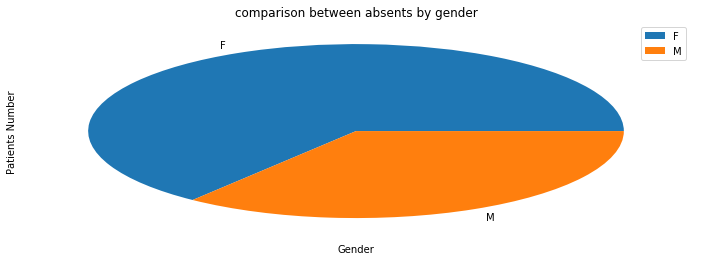

In [96]:
# what is the percentage of sexes attending?
def attendance(df, col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend()
    plt.title('comparison between absents by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance(df,'Gender',show,Noshow) 

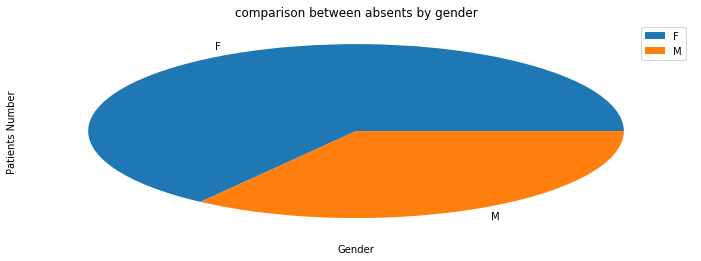

In [97]:
#what is the percentage of sexes absent?
def attendance(df, col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][Noshow].value_counts(normalize=True).plot(kind='pie',label='Noshow')
    plt.legend()
    plt.title('comparison between absents by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance(df,'Gender',show,Noshow) 

Gender has no clear effect on Attendance

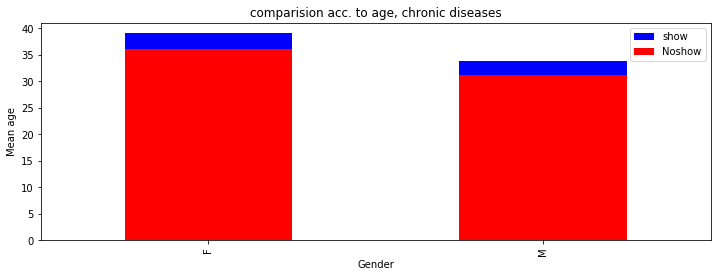

In [98]:
# does age and chronic diseases affect the attendance together(check by gender mean age
plt.figure(figsize=[12,4])# setting the figure size
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[Noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='Noshow')
plt.legend();
plt.title('comparision acc. to age, chronic diseases')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [99]:
(df[show].groupby('Gender').Age.mean(),df[Noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.median(),df[Noshow].groupby('Gender').Age.median())

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64, Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64, Gender
 F    39
 M    32
 Name: Age, dtype: int64, Gender
 F    34
 M    29
 Name: Age, dtype: int64)

There is no correlation between age and Gender affecting the Show rate
the mean and median of sexes ages are close

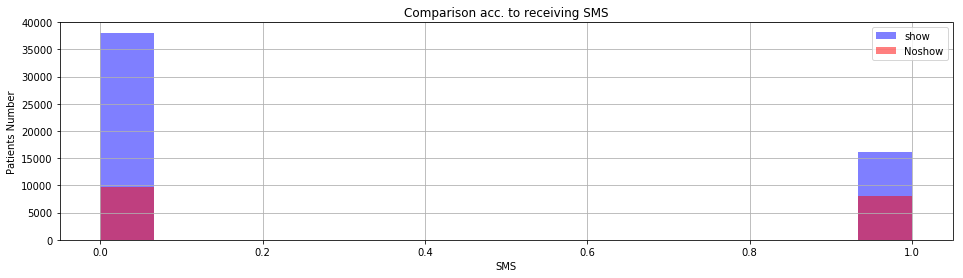

In [100]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='blue',label='show');
    df[col_name][Noshow].hist(alpha=.5,bins=15,color='red',label='Noshow')
    plt.legend();
    plt.title('Comparison acc. to receiving SMS')
    plt.xlabel('SMS')
    plt.ylabel('Patients Number');
attendance(df,'SMS_received',show,Noshow)
    
    

No of showing patient without recieving sms is greater than with sms so our sms is not very effective

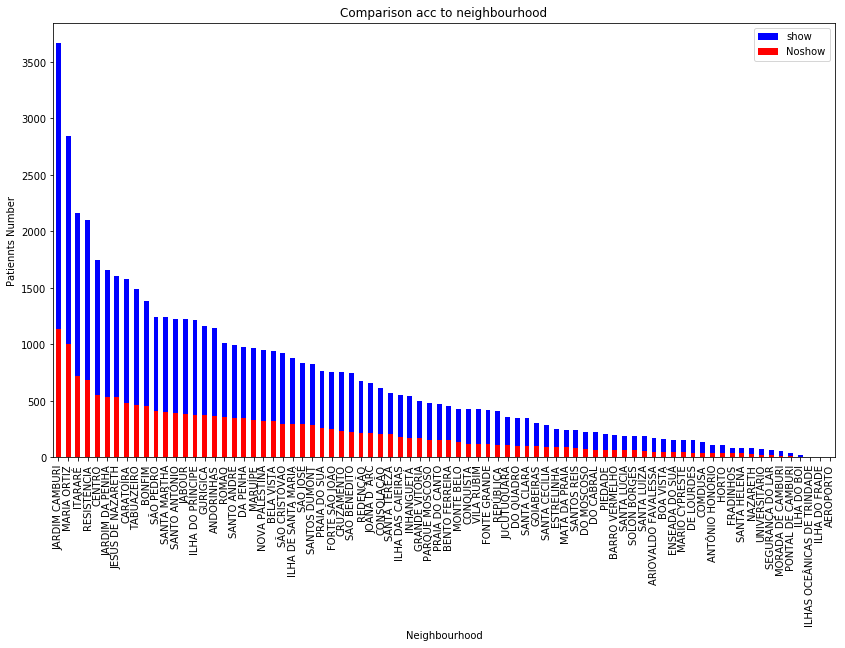

In [105]:
# investigate if neighbourhood affects attendance
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[Noshow].value_counts().plot(kind='bar',color='red',label='Noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patiennts Number');

Neigbourhood seems to have a great efffesct on attendance seeing JARDIM CAMBURI having the heightest attendance and even patient showing

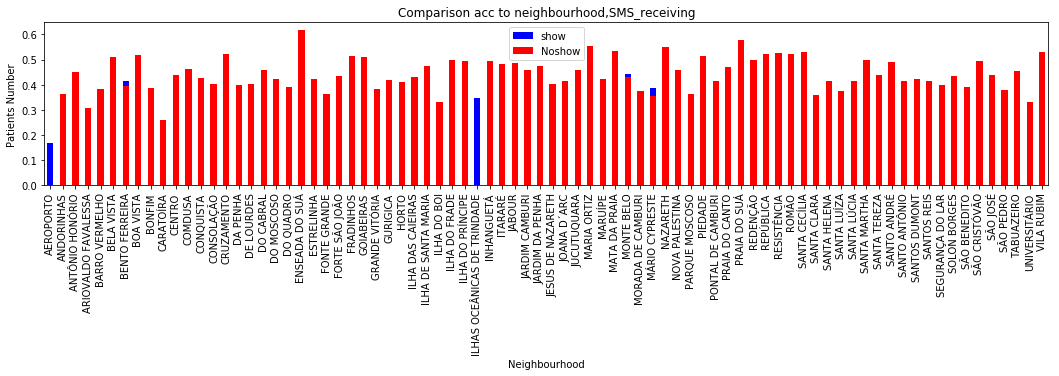

In [107]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[Noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='Noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood,SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Sms has response in few neighbourhood this is not really effective

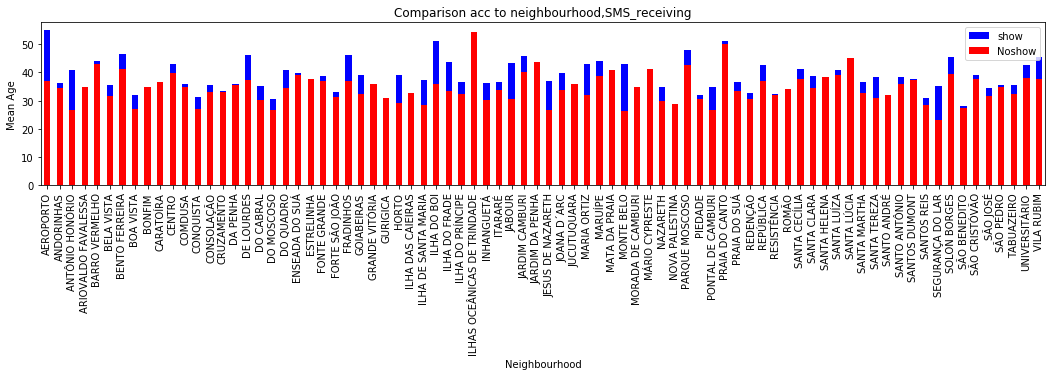

In [108]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[Noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='Noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood,SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age');

patient attendance from specific neighbourhooh differs with age AEROPORTO and ILHA DO BOI are with high rate of patient showing and age

<a id='conclusions'></a>
## Conclusions
In conclusion, 
Age has clear influence on numner of patient showing and the patient with Ages from (0-9) has the heighest number of showing they are children brought by parents then 45 to 50 and 65 years above are the least on the attendance.

Sms sent does not have effect on the number of patient showing just on a few neighbourhood

Neighbourhood has a great effect on attendance as revieled JARDIM CAMBURI has the greatest number of patient in attendance and showing rate.

## Note
There is no clear correlation between Showing and Gender, Chronic diseases, Enrollement in welfare program


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0